## coding up point cloud extraction  

In [1]:
%matplotlib inline
import sys
if '../' not in sys.path:
    sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face
# from features3D import PatchExtractor3D
from tomo_encoders.patches import Patches
import pandas as pd
import numpy as np

In [2]:
# vol_shape = (351, 2500,65)
vol_shape = (351, 350, 340)
a = np.zeros(vol_shape)

In [3]:
def plot_3D_feature(p, fig, plot_type = 'centers', ife = 0):
    
    ax = fig.add_subplot(projection='3d')
    
    if plot_type == 'centers':
        ax.scatter(p.centers()[:,0], p.centers()[:,1], p.centers()[:,2], c = p.features[:,ife])
    elif plot_type == 'corners':
        ax.scatter(p.points[:,0], p.points[:,1], p.points[:,2], c = p.features[:,ife])
        
    ax.set_xlim3d(0, p.vol_shape[0])
    ax.set_ylim3d(0, p.vol_shape[1])
    ax.set_zlim3d(0, p.vol_shape[2])    
    return

**Initialize with data**  

In [4]:
points = [[0, 10, 50], [50, 30, 50]]
widths = [[64,64,64], [256,256,256]]
p = Patches(vol_shape, initialize_by = "data", \
            points = points, widths = widths, \
            check_valid = True, \
            features = np.random.normal(0,1, (len(points),2)))

In [5]:
print(p.points.shape)
print(p.features.shape)
print(p.widths.shape)

(2, 3)
(2, 2)
(2, 3)


In [6]:
# test get_slices()
p.slices()

array([[slice(0, 64, 1), slice(10, 74, 1), slice(50, 114, 1)],
       [slice(50, 306, 1), slice(30, 286, 1), slice(50, 306, 1)]],
      dtype=object)

**Initialize with grid**  

In [7]:
patch_size = (64,64,64)
stride = 2
p = Patches(vol_shape, initialize_by = "grid", patch_size = patch_size, stride = stride)

**test feature addition / appending** 

In [8]:
nf = 5
features = np.random.normal(0, 1, (p.points.shape[0], nf))
patch_size = (64,64,64)
p.add_features(features, names = ['h%02d'%i for i in range(nf)])
print(p.features.shape)

(27, 5)


In [9]:
nf = 2
features = np.random.normal(0, 1, (p.points.shape[0], nf))

In [10]:
p.add_features(features, names = ['z%02d'%i for i in range(nf)])
p.features.shape

(27, 7)

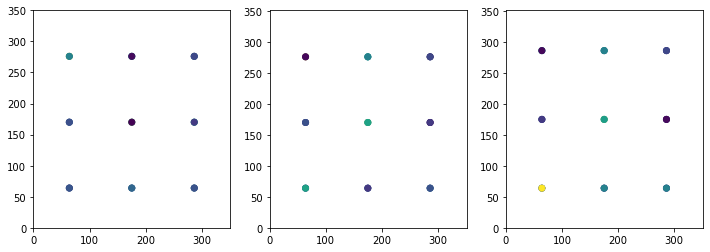

In [11]:
fig, ax = plt.subplots(1,3, figsize = (12,4))
ife = 0

ivals = [(0, 1, 2), (1, 0, 2), (2, 0, 1)]

for ival in ivals:
    ip, i1, i2 = ival
    ax[ip].scatter(p.centers()[:,i1], p.centers()[:,i2], c = p.features[:,ife])
    ax[ip].set_xlim([0, vol_shape[i1]])
    ax[ip].set_ylim([0, vol_shape[i1]])

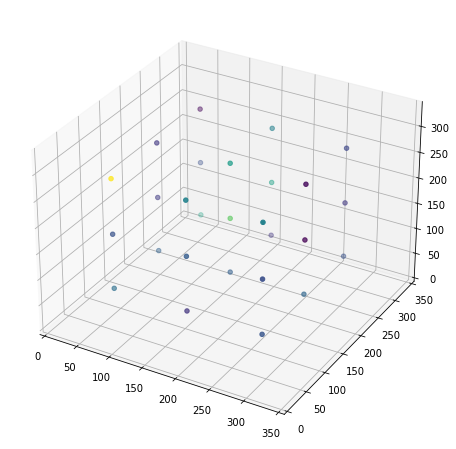

In [12]:
fig = plt.figure(figsize = (8,8))
plot_3D_feature(p, fig, plot_type = 'centers', ife = 0)

**test filter by condition**

In [13]:
condlist = np.random.randint(0, 2, (p.points.shape[0], 1)) == 1
# condlist

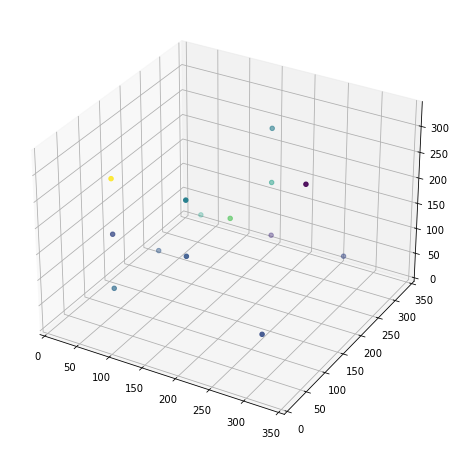

In [14]:
p_filt = p.filter_by_condition(condlist)
fig = plt.figure(figsize = (8,8))
plot_3D_feature(p_filt, fig, plot_type = 'centers', ife = 0)

**test sort by feature**

In [15]:
ife = 0
p_sort = p.sort_by_feature(ife = ife)
# p_sort = p.sort_by_feature(feature = p.features[:,0])

**test select by feature**

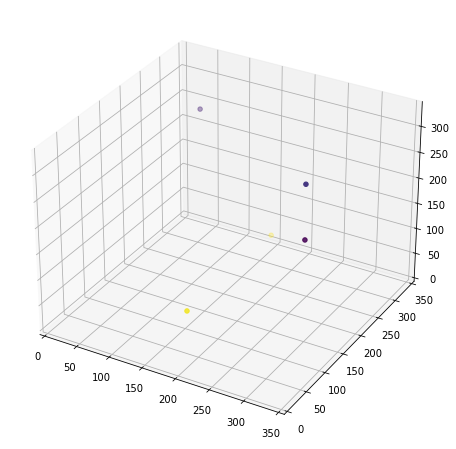

In [16]:
ife = 0
p_sel = p.select_by_feature(5, ife = ife, selection_by = "lowest")
fig = plt.figure(figsize = (8,8))
plot_3D_feature(p_sel, fig, plot_type = 'centers', ife = ife)

**test patch extraction and reconstruction**

In [17]:
a = (0,1,4)
b = (1,2,3)
a == b

False

**test call by feature name**

In [18]:
p.features_to_numpy(['h03', 'z01']).shape

(27, 2)

In [19]:
p.features.shape

(27, 7)